In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


In [2]:
%cd /content/drive/MyDrive/depth_estimation

/content/drive/MyDrive/depth_estimation


In [3]:
from utils.net_utils import load_rgb_img,load_mde_model,midas_infer

In [4]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 79.1 MB/s eta 0:00:00


In [5]:
model_type = "DPT_Hybrid"
midas = torch.hub.load("intel-isl/MiDaS", model_type)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(
Downloading: "https://github.com/isl-org/MiDa

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

In [7]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [8]:
img = cv2.imread("/content/drive/MyDrive/Fusion_net/data/image/1686210162151891200.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [9]:
input_batch = transform(img).to(device)

In [10]:
with torch.no_grad():
    prediction = midas(input_batch)
    print(prediction.shape)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

torch.Size([1, 384, 672])


In [11]:
img.shape[:2]

(720, 1280)

In [ ]:
output.shape

(640, 480)

In [ ]:
output.shape

(640, 480)

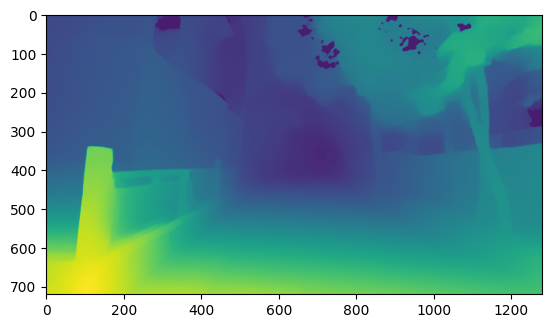

In [12]:
plt.imshow(output)

In [ ]:
img.max()

38.8828125

In [13]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [14]:
midas, transform = load_mde_model("DPT_Hybrid")

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
output = midas_infer(midas,img_path="/content/drive/MyDrive/depth_estimation/data/rgb/000000.jpg",transform=transform,device=device)

In [16]:
img_dir = sorted(os.listdir("/content/drive/MyDrive/Fusion_net/data/image"))

In [18]:
img_dir[0]

'1686210162151891200.png'

In [19]:
import matplotlib.pyplot as plt

In [20]:
import os
import matplotlib.pyplot as plt

folder_path = "/content/drive/MyDrive/Fusion_net/data/image"
folder_to_save = "/content/drive/MyDrive/Fusion_net/data/mmde_map"

# Assuming img_dir contains the list of image filenames
file_paths = [os.path.join(folder_path, file_name) for file_name in img_dir]

for idx, file_path in enumerate(file_paths):
    output = midas_infer(midas, img_path=file_path, transform=transform, device=device)

    # Save the figure
    save_path = os.path.join(folder_to_save, f"{img_dir[idx]}")
    plt.imshow(output)  # Display the output depth map
    plt.axis('off')     # Turn off axes for better visualization
    plt.savefig(save_path, format="jpg", bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the plot to avoid overlap for the next image
